In [1]:
!git clone https://github.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer

Cloning into 'boilerplate-page-view-time-series-visualizer'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 40 (delta 10), reused 4 (delta 4), pack-reused 24
Receiving objects: 100% (40/40), 483.48 KiB | 4.69 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('boilerplate-page-view-time-series-visualizer/fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

# Clean data
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & 
(df['value'] <= df['value'].quantile(0.975))]
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


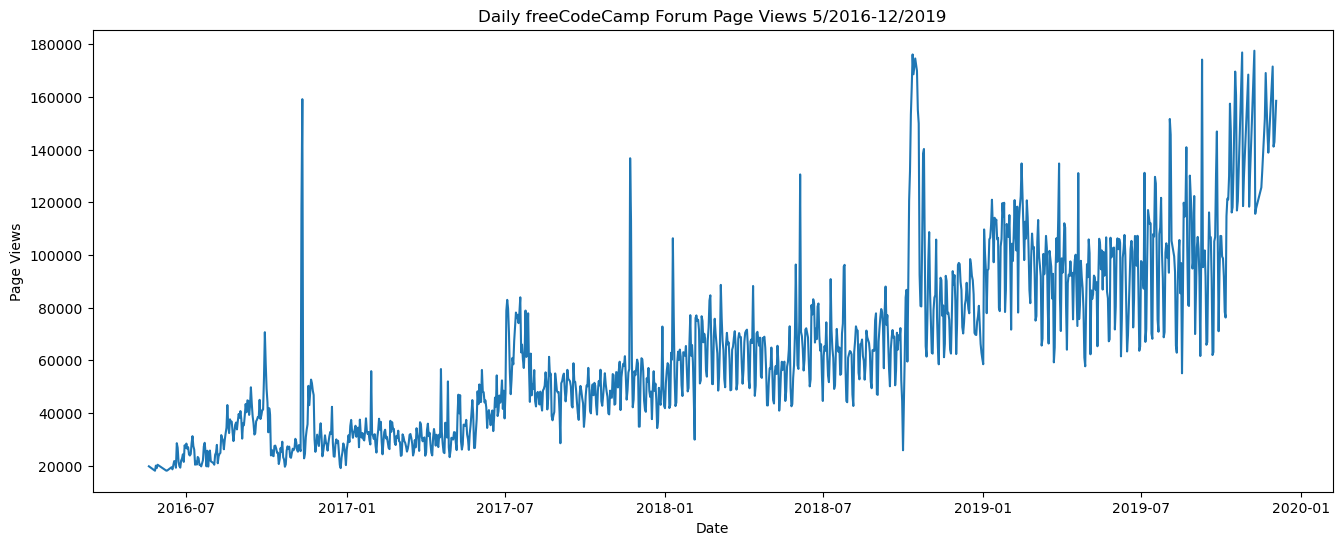

In [3]:
# Draw line plot
fig, ax = plt.subplots(figsize=(16, 6))
ax = sns.lineplot(data=df, x='date', y='value')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')


# Save image and return fig (don't change this part)
fig.savefig('line_plot.png')

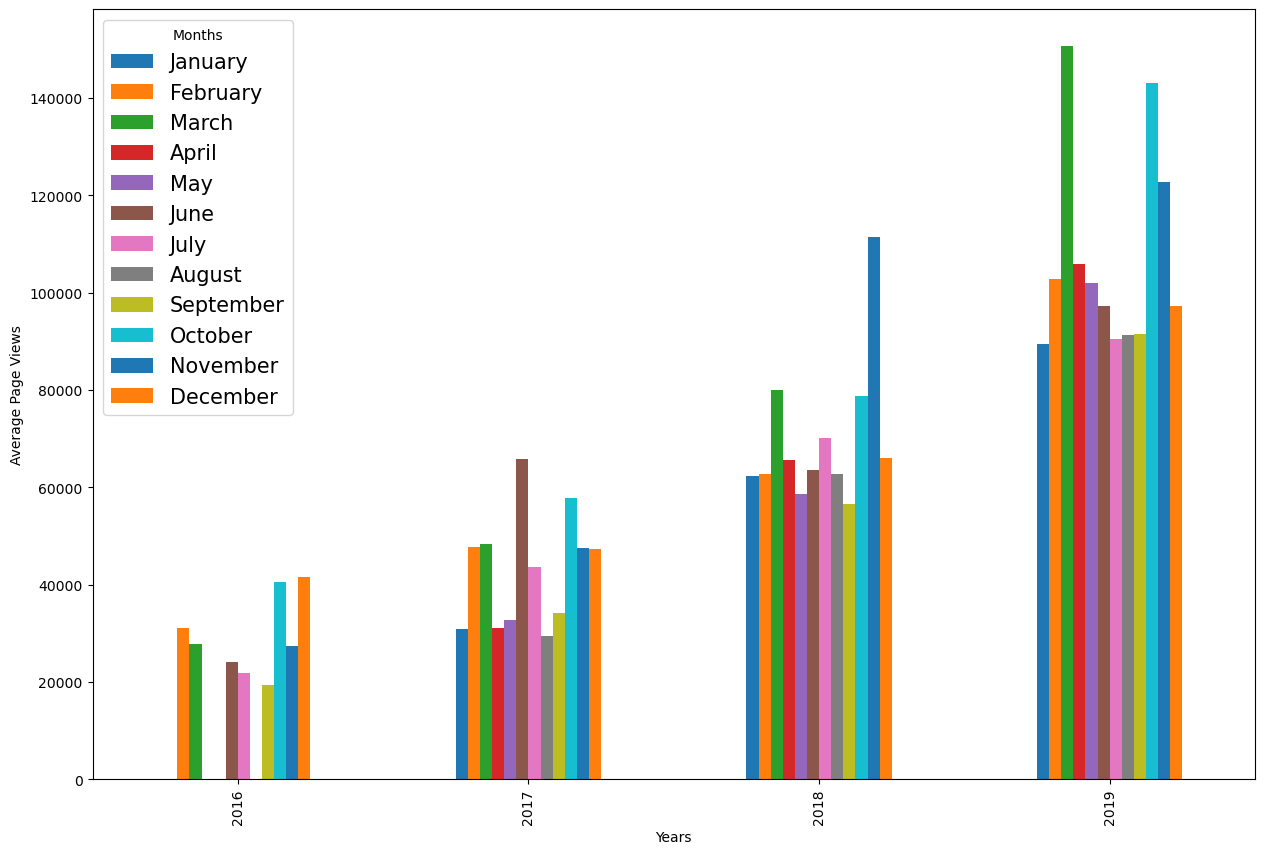

In [4]:
# Copy and modify data for monthly bar plot
df_bar = df.copy().reset_index()
df_bar['year'] = [d.year for d in df_bar.date]
df_bar['month'] = [d.strftime('%B') for d in df_bar.date]

# It should show average daily page views for each month grouped by year. 
df_bar = df_bar.groupby(['year', 'month'])['value'].mean()#.reset_index()
df_bar = df_bar.unstack()
#columns
df_bar.columns = ['January','February','March','April','May','June','July','August','September','October','November','December']
# Draw bar plot
fig = df_bar.plot(kind= 'bar', figsize = (15,10)).figure

plt.title('')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(title= 'Months', fontsize = 15)


# Save image and return fig (don't change this part)
fig.savefig('bar_plot.png')

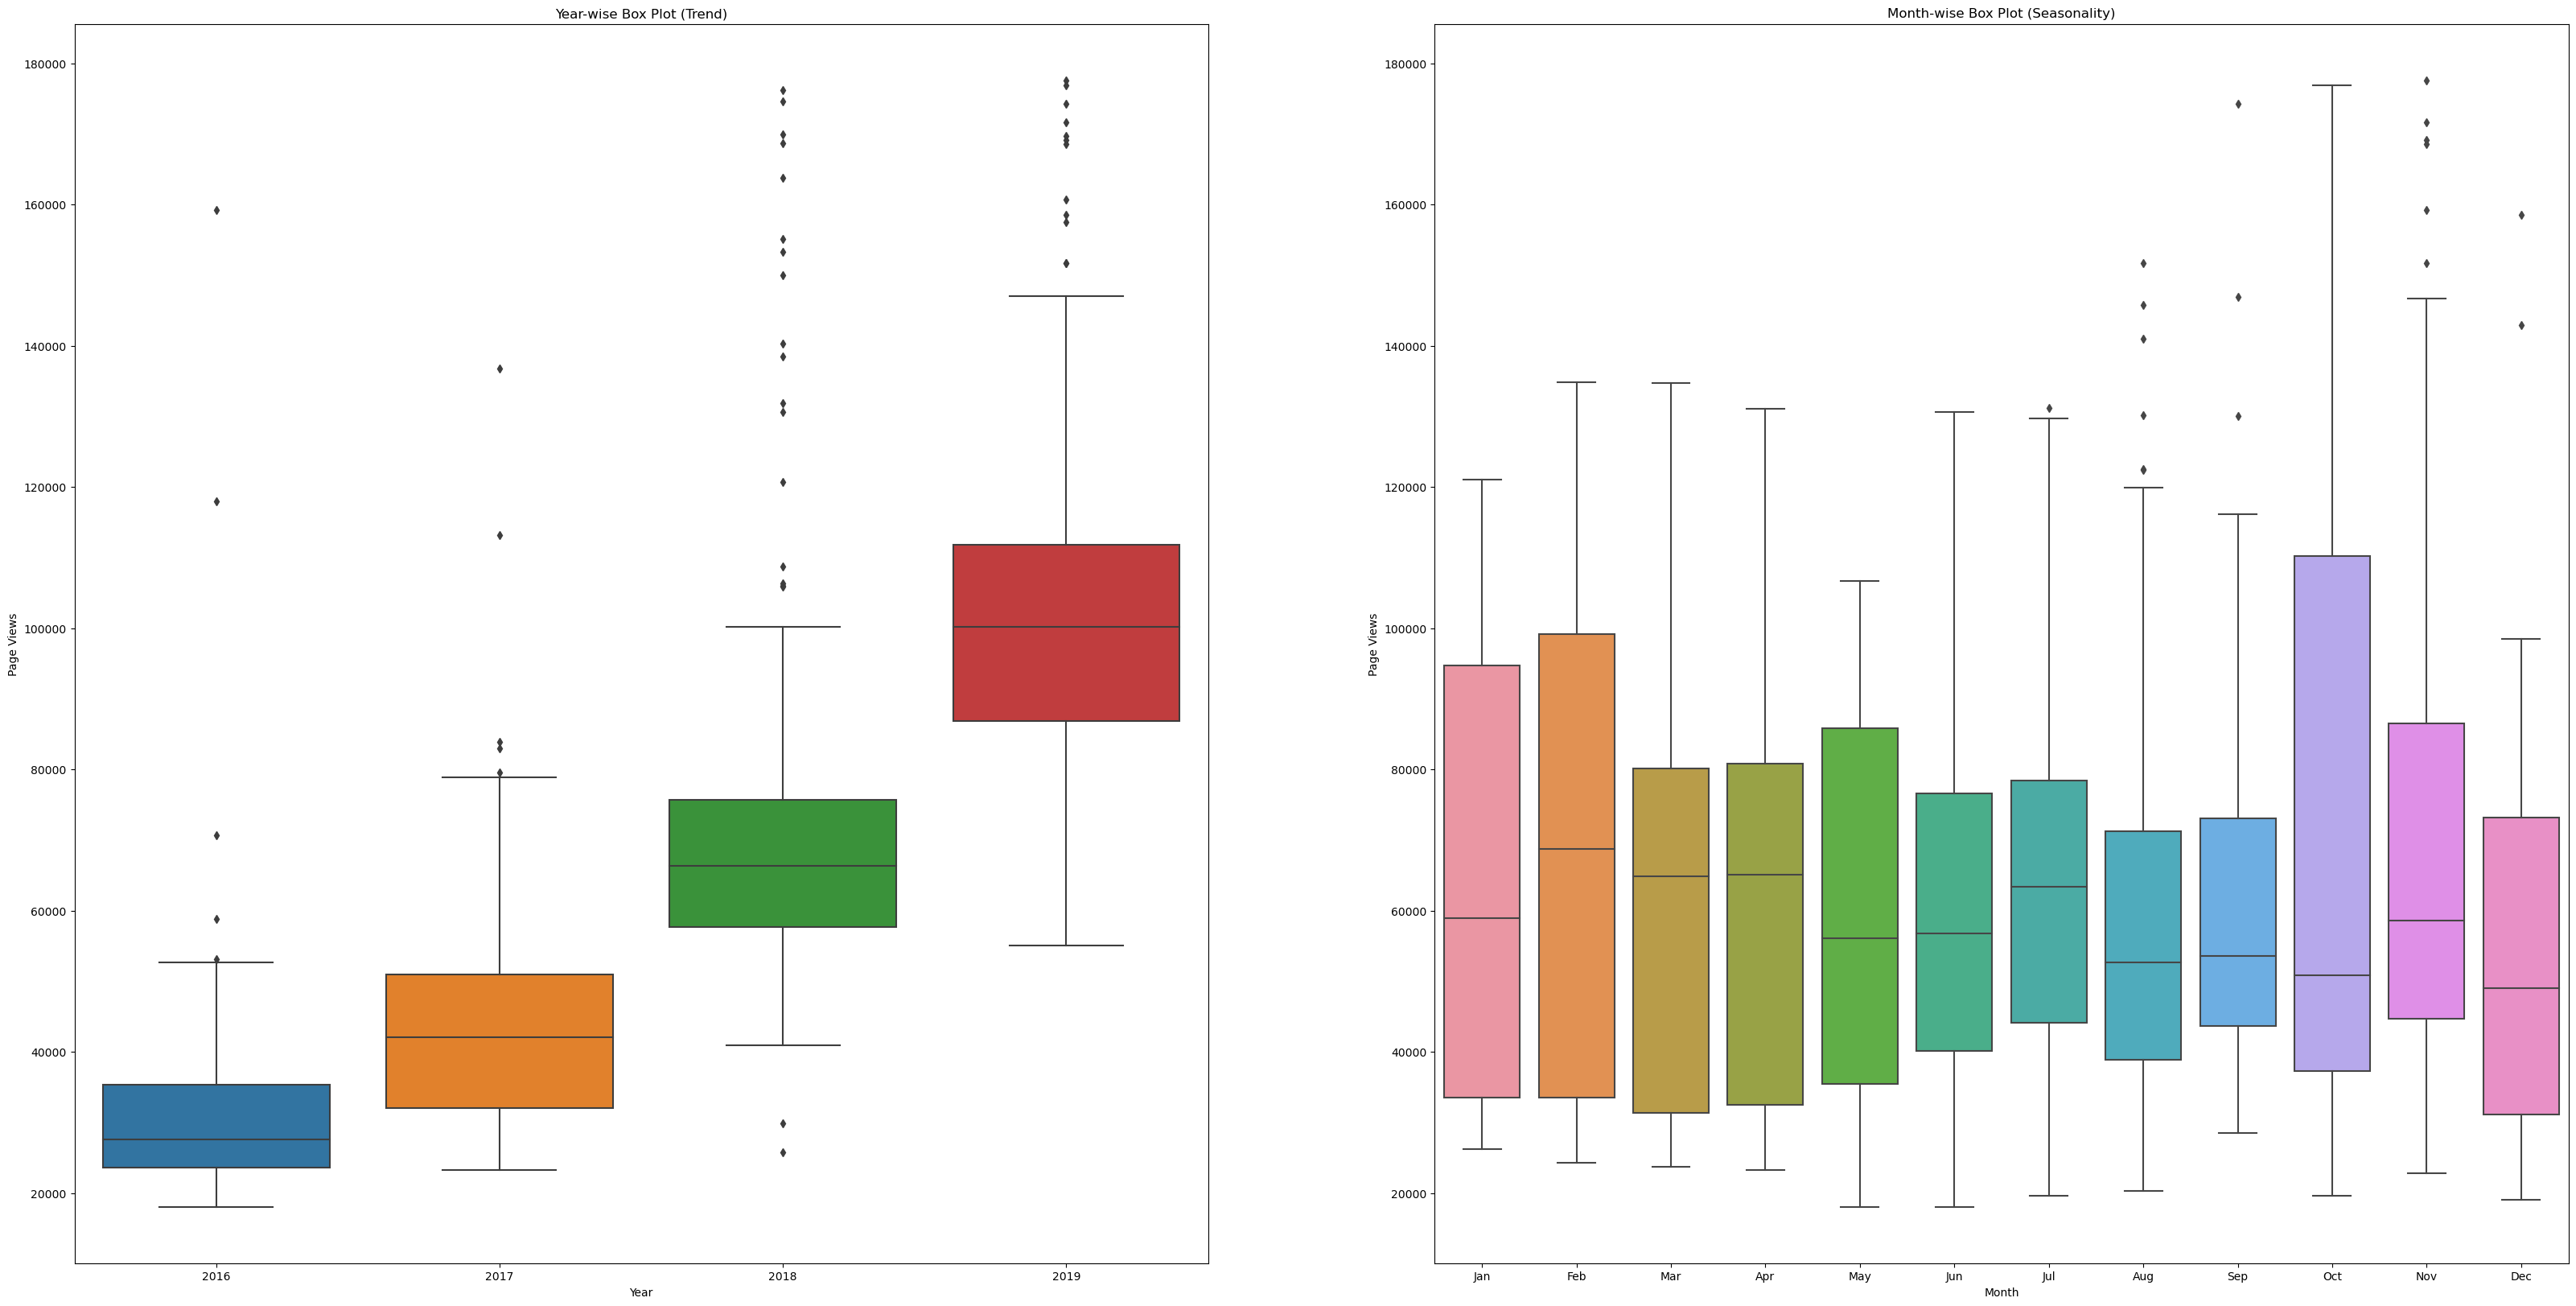

In [5]:
# Prepare data for box plots (this part is done!)
df_box = df.copy().reset_index()
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 20))
sns.boxplot(ax=ax1, x="year", y= "value", data=df_box) 
ax1.set_title("Year-wise Box Plot (Trend)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Page Views")

month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

sns.boxplot(ax=ax2, x="month", y= "value", data=df_box, order = month_order)
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel("Month")
ax2.set_ylabel("Page Views")




# Save image and return fig (don't change this part)
fig.savefig('box_plot.png')